# Patients Readmission Prediction (Diabetes)
### Link to dataset:  https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

The main goal of this project is to analyze the "Diabetes 130-US Hospitals for Years 1999-2008" dataset and apply machine learning algorithms such as Logistic Regression, Random Forest Classifier, Decision Tree, and Support Vector Machine to predict whether a diabetes patient will be rehospitalized within 30 days of discharge.

## Data cleaning and preprocessing

### Exploratory Data Analysis

In [1]:
#import all necessary libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the csv datasets
df = pd.read_csv('diabetic_data.csv')

Check columns, variable type and missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Now, let explore our dataset column wise in more details, taking 10 columns at a time.

In [4]:
df.iloc[:, :10].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1


In [5]:
df.iloc[:, 10:20].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


In [6]:
df.iloc[:, 20:30].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,1,NaN,NaN,No,No,No,No,No,No
1,255,9,NaN,NaN,No,No,No,No,No,No
2,V27,6,NaN,NaN,No,No,No,No,No,No
3,403,7,NaN,NaN,No,No,No,No,No,No
4,250,5,NaN,NaN,No,No,No,No,No,No


In [7]:
df.iloc[:, 30:40].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [8]:
df.iloc[:, 40:].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,NO
1,No,Up,No,No,No,No,No,Ch,Yes,>30
2,No,No,No,No,No,No,No,No,Yes,NO
3,No,Up,No,No,No,No,No,Ch,Yes,NO
4,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Anylyzing and Handling Missing Values

In this dataset, the missing values were filled with a question mark '?'. Let's replace missing values with a **nan** representation.  

In [9]:
# replace ? with nan
df = df.replace('?',np.nan)

Numerous categorical variables are evident from this. The variables `with _id` are also categorical as examined from the IDs_mapping.csv file. We will now examine the distinct values for every column.

In [10]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 101766 unique values
patient_nbr: 71518 unique values
race
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient

#### Analyzing the percentage of missing values on selected columns
Let analyse the percentage of missing values in some selected  chosen columns.

In [11]:
# Calculate missing percentages and unknown counts for specified columns
a1c_null_percentage = df['A1Cresult'].isnull().mean() * 100
max_glu_null_percentage = df['max_glu_serum'].isnull().mean() * 100
weight_null_percentage = df['weight'].isnull().mean() * 100

# Display the results
print(
      f"- Percentage of missing values in 'A1Cresult': {a1c_null_percentage:.2f}%\n"
      f"- Percentage of missing values in 'max_glu_serum': {max_glu_null_percentage:.2f}%\n"
      f"- Percentage of missing values in 'weight': {weight_null_percentage:.2f}%\n")


- Percentage of missing values in 'A1Cresult': 83.28%
- Percentage of missing values in 'max_glu_serum': 94.75%
- Percentage of missing values in 'weight': 96.86%



As observed from the data description, the columns `payer_code` specify a code for various mode of payment, while `encounter_id` and `patient_nbr` are identification numbers. These columns do not provide meaningful information for predicting patient readmission and are therefore excluded from the analysis. Additionally, the columns `A1Cresult, max_glu_serum`, and `weight` have significant proportions of missing values 83.28%, 94.74%, and 96.86%, respectively making them unsuitable for effective use in the model. Hence, we will drop these columns.


#### Checking  Drug-Related Features

We analyze drug-related columns to understand the patterns and distribution of medications prescribed to patients in the dataset. This step helps us identify potential relationships between drug usage and patient readmissions, which could be significant for predicting outcomes and tailoring interventions. By exploring the value counts for each drug, we gain insights into their prevalence and usage trends within the dataset.

In [12]:
# List of drug-related columns
drug_columns = [
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
    'citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'tolbutamide', 
    'acetohexamide', 'chlorpropamide', 'nateglinide', 'rosiglitazone', 'glyburide', 
    'glipizide', 'metformin', 'pioglitazone', 'glyburide-metformin', 'glimepiride', 'repaglinide'
    
]

# Iterate over the drug columns and print value counts
for column in drug_columns:
    if column in df.columns:  # Check if column exists in the dataframe
        print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

Value counts for metformin-pioglitazone:
metformin-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64

Value counts for metformin-rosiglitazone:
metformin-rosiglitazone
No        101764
Steady         2
Name: count, dtype: int64

Value counts for glimepiride-pioglitazone:
glimepiride-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64

Value counts for glipizide-metformin:
glipizide-metformin
No        101753
Steady        13
Name: count, dtype: int64

Value counts for citoglipton:
citoglipton
No    101766
Name: count, dtype: int64

Value counts for examide:
examide
No    101766
Name: count, dtype: int64

Value counts for tolazamide:
tolazamide
No        101727
Steady        38
Up             1
Name: count, dtype: int64

Value counts for troglitazone:
troglitazone
No        101763
Steady         3
Name: count, dtype: int64

Value counts for miglitol:
miglitol
No        101728
Steady        31
Down           5
Up             2
Name: count, dtyp

#### Dropping Drug Related Features

We have chosen to drop several columns related to medications because the majority of their values indicate "No," meaning the drugs were not prescribed. This lack of variability makes these columns uninformative for predicting patient readmission. Retaining features with such low variability can add noise to the model, potentially reducing its predictive power. For instance, columns like metformin-pioglitazone, citoglipton, and troglitazone have over 99% of their entries as "No." Therefore, dropping these columns helps simplify the dataset without significant loss of information. 

`metformin-pioglitazone', 'metformin-rosiglitazone','glimepiride-pioglitazone','glipizide-metformin','citoglipton','examide','tolazamide','troglitazone','miglitol','acarbose','tolbutamide','acetohexamide','chlorpropamide','nateglinide, 'rosiglitazone','glyburide', 'glipizide', 'metformin', 'pioglitazone', 'glyburide-metformin',  'glimepiride', 'repaglinide','tolazamide','troglitazone','miglitol','acarbose','tolbutamide','acetohexamide','chlorpropamide','nateglinide'`

In [13]:
columns_to_drop = [
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
    'citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'tolbutamide', 
    'acetohexamide', 'chlorpropamide', 'nateglinide', 'rosiglitazone', 'payer_code', 'glyburide', 
    'glipizide', 'encounter_id', 'max_glu_serum', 'metformin', 'pioglitazone', 'glyburide-metformin', 
    'patient_nbr', 'glimepiride', 'repaglinide', 'weight', 'A1Cresult'
]

df = df.drop(columns=columns_to_drop, errors='ignore')


#### Checking for Missing Values After Dropping Irrelevant Features

In [14]:
print(df.isnull().sum())

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64


#### Let check columns with Numeric features

The columns that are numeric and used for prediction are:  
`time_in_hospital`, `num_lab_procedures`, `num_procedures`, `num_medications`, `number_outpatient`, `number_emergency`, `number_inpatient`, and `number_diagnoses`.

To ensure data quality, we checked these numeric features for missing values (null values). Missing values can negatively impact model performance and must be addressed appropriately. The analysis revealed the following counts of missing values for each numeric columns.

In [15]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']
# Check for missing values in the specified columns
missing_counts = df[cols_num].isnull().sum()

# Display the count of missing values per column
print("Missing values per column:")
print(missing_counts)


Missing values per column:
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64


The numeric columns appear to be in good condition and do not require any further modifications at this stage.

#### Let check columns with Categorical features

We are checking for missing values in the categorical features of the dataset by using the `.isnull().sum()` method. This step helps identify any columns that may have incomplete data, which is crucial for data preprocessing. Handling missing values appropriately ensures that the model is trained on reliable and complete information, which can improve its performance and accuracy.

In [16]:
cols_cat=['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 
          'medical_specialty', 'diag_1', 'diag_2', 'diag_2', 'change', 'diabetesMed', 'insulin', 'readmitted'
          ]
#check for missing values in Categorical features
df[cols_cat].isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_2                        358
change                          0
diabetesMed                     0
insulin                         0
readmitted                      0
dtype: int64

##### Handling Missing Values In Categorical Features

The `medical_specialty` column contains a significantly high number of missing values (49,949), indicating potential issues with data completeness.
Columns like `gender`, `age`, `admission_type_id`, and others have no missing values, ensuring their reliability for analysis.
A small proportion of missing values is present in the `race` (2,273), `diag_1` (21), and `diag_2`/`diag_3` (358 each)  columns which we will handle in the next step.


In [17]:
# Impute missing values with the most common category
df.loc[:, 'race'] = df['race'].fillna(df['race'].mode()[0])

# Replace missing values with a placeholder like "Unknown"
df.loc[:, 'medical_specialty'] = df['medical_specialty'].fillna('Unknown')

# Replace missing codes with the most frequent (mode) value in each column
df.loc[:, 'diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df.loc[:, 'diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df.loc[:, 'diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

To ensure consistency and prevent bias, we imputed the most frequent category (mode) to categorical columns such as `race, diag_1, diag_2, and diag_3` in order to address missing values in the dataset. To express uncertainty without erasing data, the placeholder "Unknown" was used for `medical_specialty` in place of missing values. These methods are crucial because they guarantee that machine learning models can handle the entire dataset, reduce bias, prevent data loss, and maintain data integrity. 

In [18]:
df.groupby('gender').size()

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

#### Removing Non Meaningful Values "Unknown/Invalid" in *gender*

In [19]:
df = df[df['gender'] != 'Unknown/Invalid']

The rows with `gender` labeled as Unknown/Invalid were removed to ensure data accuracy and consistency. These values are not meaningful for analysis and could introduce noise or bias into models.

#### Checking Uniques Values in *medical_specialty*

We are checking the unique values in the `medical_specialty` column to gain insights into the diversity of medical specialties present in the dataset.

In [20]:
# Set Pandas display option to show all rows
pd.set_option('display.max_rows', 20)

# Count the unique values in the 'medical_specialty' column
print(f"Unique medical specialties count: {df['medical_specialty'].nunique()}")

# Group by 'medical_specialty' and count the occurrences, sorting the results in descending order
specialty_counts = df['medical_specialty'].value_counts()
print(specialty_counts)

Unique medical specialties count: 73
medical_specialty
Unknown                   49947
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5351
                          ...  
Proctology                    1
Speech                        1
SportsMedicine                1
Perinatology                  1
Neurophysiology               1
Name: count, Length: 73, dtype: int64


The `medical_specialty` column contains 73 unique values, many of which are either 'Unknown' or occur infrequently. To simplify the analysis, we will retain the top 10 most frequent specialties and categorize the rest as "Others." This reduces data complexity while preserving key categories for analysis.

##### Simplifying Uniques Values in *medical_specialty*

In [21]:
# Define the top 9 specialties
top_10 = ['Unknown','InternalMedicine', 'Emergency/Trauma',
          'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
          'Nephrology', 'Orthopedics',
          'Orthopedics-Reconstructive', 'Radiologist']

# Replace all specialties not in the top 10 with 'Other' directly in 'medical_specialty' column
df.loc[~df['medical_specialty'].isin(top_10), 'medical_specialty'] = 'Other'

In [22]:
df.groupby('medical_specialty').size()

medical_specialty
Cardiology                     5351
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Other                          8340
Radiologist                    1140
Surgery-General                3099
Unknown                       49947
dtype: int64

#### Grouping Diagnosis Codes into Medical Conditions
We are grouping `diag_1, diag_2,diag_3` values into medical conditions based on the ICD-9 standard to simplify the data for analysis. This categorization allows us to identify trends more easily. Non-numeric or invalid codes are assigned to 'Unknown' to maintain data consistency and avoid errors.

In [23]:
# Grouping Diagnosis Codes by Medical Condition or System
def group_diag_code(code):
    try:
        # Try to convert the code to a float, if it's a numeric value
        code = float(code)
        
        # Categorize code into medical conditions based on defined ranges
        if 250 <= code < 251:
            return 'Diabetes'
        elif 390 <= code < 460:
            return 'Circulatory'
        elif 460 <= code < 520:
            return 'Respiratory'
        elif 520 <= code < 580:
            return 'Digestive'
        elif 800 <= code < 1000:
            return 'Injury'
        else:
            return 'Other'
    except ValueError:
        # If code is not numeric, return 'Unknown'
        return 'Unknown'

# Apply the grouping function to the 'diag_1', 'diag_2', and 'diag_3' columns
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].map(group_diag_code)

# Display the first few rows to check the transformation
print(df[['diag_1', 'diag_2', 'diag_3']].head())

     diag_1    diag_2       diag_3
0  Diabetes     Other     Diabetes
1     Other  Diabetes        Other
2     Other  Diabetes      Unknown
3     Other  Diabetes  Circulatory
4     Other     Other     Diabetes


#### Analyzing the Target Column: *readmitted*


In [ ]:
#groups the data in the DataFrame df by the unique values in the readmitted column
df.groupby('readmitted').count()
df.groupby('race').count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
<30,11357,11357,11357,11357,11357,11357,11357,11357,11357,11357,...,11357,11357,11357,11357,11357,11357,11357,11357,11357,11357
>30,35545,35545,35545,35545,35545,35545,35545,35545,35545,35545,...,35545,35545,35545,35545,35545,35545,35545,35545,35545,35545
NO,54861,54861,54861,54861,54861,54861,54861,54861,54861,54861,...,54861,54861,54861,54861,54861,54861,54861,54861,54861,54861


In [25]:
# Drop rows with 'No' in 'readmitted' and convert '<30' to 'Yes', '>30' to 'No'
df = df[df['readmitted'] != 'NO'].assign(
    readmitted=lambda x: x['readmitted'].apply(lambda val: 'Yes' if val == '<30' else 'No')
)


The target column readmitted has three unique values. Rows with "No" are dropped as they indicate no record. The remaining values are converted into binary format: "<30" is mapped to "Yes" (readmitted within 30 days), and ">30" is mapped to "No" (readmitted after 30 days).

##### Visualizing the Distribution of the `readmitted` Variable
We will use a countplot to observe the distribution of the `readmitted` variable. This visualization will highlight any class imbalance, which is critical for informing decisions about data preprocessing and model selection. 


<Axes: title={'center': 'Variable readmitted'}, xlabel='readmitted', ylabel='count'>

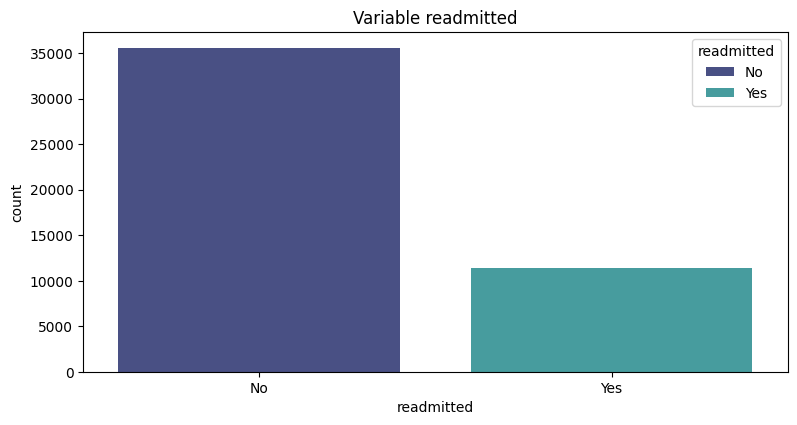

In [26]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 6)
plt.gca().set_title('Variable readmitted')
sns.countplot(x='readmitted', hue='readmitted', data=df, palette='mako', dodge=False, legend=True)


The countplot shows the distribution of the `readmitted` variable, which has two classes: `Yes` (readmitted within 30 days) and `No` (readmitted after 30 days). The visualization shows a significant class imbalance, with the majority of instances being in the `No` category. This imbalance is important to address, as it may lead to biased model predictions.We will address this class imbalance during the model design.


#### Excluding Records Based on Discharge Disposition


In [27]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     27119
2      1010
3      6962
4       382
5       597
      ...  
23      174
24       23
25      468
27        1
28       85
Length: 23, dtype: int64

In [28]:
df = df[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

The column `discharge_disposition_id` represents the patient's destination after hospitalization. Upon reviewing the IDs_mapping.csv file, we identified that the following IDs — 11, 13, 14, 19, 20, and 21 — correspond to cases of death or hospice care. Since these outcomes are not relevant to our readmission prediction model, we will exclude these records from the dataset to ensure the model focuses on meaningful predictions.

#### Visualizing Primary Diagnosis Distribution


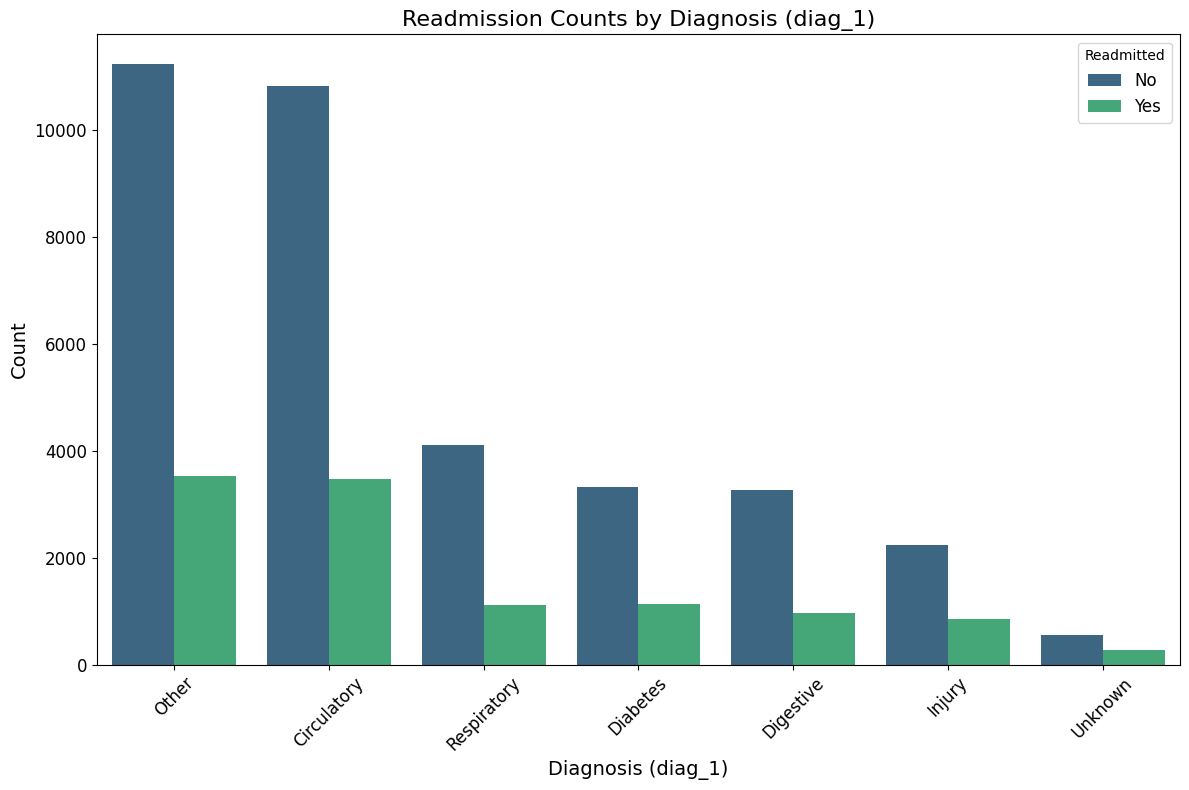

In [29]:
# Focus on the top 10 most frequent diag_1 categories
top_diag_1 = df['diag_1'].value_counts().nlargest(10).index
filtered_df = df[df['diag_1'].isin(top_diag_1)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='diag_1', hue='readmitted', palette='viridis', order=top_diag_1)

# Customize the plot
plt.title('Readmission Counts by Diagnosis (diag_1)', fontsize=16)
plt.xlabel('Diagnosis (diag_1)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Readmitted', labels=['No', 'Yes'], fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

To better understand the dataset, we created a bar plot to visualize the distribution of values in the `diag_1`column, which represents the primary diagnosis of patients. This visualization highlights the frequency of various diagnosis categories, offering insights into which conditions are most commonly represented. By analyzing this distribution, we can identify dominant diagnoses, such as "Circulatory" or "Other," and assess the balance of data across categories. Such information is crucial for designing effective machine learning models, especially for predicting patient outcomes like readmission, as it allows us to account for potential biases introduced by imbalanced data.

#### Check for any duplicate row
This code lets us check if our dataset has any duplicate rows. Catching duplicates is important because they can mess up our analysis and lead to wrong conclusions. It’s a quick way to make sure our data is clean and reliable!

In [30]:
# Check if there are any duplicates
has_duplicates = df.duplicated().any()
print("Are there any duplicates?", has_duplicates)

Are there any duplicates? False


### Converting Categorical Feature to Numeric

#### Manual encoding categorical feature

Categorical features represent non-numeric information, such as race and gender. To transform these non-numeric values into numeric format, we will use **manual encoding and One-Hot Encoding**. These techniques make categorical data suitable for machine learning algorithms by converting it into a numeric form.

For this task, we will manually encode the binary categorical features gender, change, diabetesMed, age, and readmitted. This approach ensures precise control over the mappings, making the data consistent and interpretable for analysis.

In [31]:
# Manually encode categorical columns with specified mappings
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})
df['readmitted'] = df['readmitted'].map({'No': 0, 'Yes': 1})

Convert the age range values into numeric features by represent each range by the midpoint of the range. This method allows to retain the information about the age group while making it usable for machine learning models.

In [32]:
# # Define a dictionary mapping age ranges to their midpoints
age_range_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Apply the mapping to the 'age' column
df['age'] = df['age'].map(age_range_map)

#### One-Hot Encoding Remaining Categorical Feature

 We will encode the listed columns  *(race, admission_type_id, discharge_disposition_id, admission_source_id, medical_specialty, diag_1, diag_2, diag_3, insulin)*, that are Nominal Categorical Variables (No Inherent Order) using  One-Hot Encoding. This method creates a new binary column for each unique value, effectively representing the presence or absence of each value.

Now the problem is that if we create a column for each unique value, we have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not AfricanAmerican, Asian, Causasian, Hispance or Other, it must be Unknown. To deal with this, we can use the **drop_first** option, which will drop the first categorical value for each column.


In [33]:
# Define the columns to apply One-Hot Encoding
columns_to_encode = [
    'race', 'admission_type_id', 'discharge_disposition_id', 
    'admission_source_id', 'medical_specialty', 'diag_1', 
    'diag_2', 'diag_3', 'insulin'
]

# Apply One-Hot Encoding using pd.get_dummies, drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Identify the newly created encoded columns based on the original column names
encoded_columns = [col for col in df.columns if col.startswith(tuple(columns_to_encode))]

# Convert the newly created encoded columns to integers (0 or 1)
df[encoded_columns] = df[encoded_columns].astype(int)

In [34]:
# Replace 'Ch' with 'Yes' in the specified column
column_name = 'change'  # Replace with the actual column name
df[column_name] = df[column_name].replace({'Ch': 'Yes'})

### Engineering Features Summary

In [35]:
print('Numerical Features:',len(cols_num))
print('Categorical Features Before Encoding:',len(cols_cat))
print(f"Total Number of Categorical features after encoding and Numerical Features : {len(df.columns)}")

Numerical Features: 8
Categorical Features Before Encoding: 14
Total Number of Categorical features after encoding and Numerical Features : 86


## Model Selection for Diabetes Patient Readmission Within 30 Days 

**Logistic Regression, Random Forest Classifier, and Decision Tree**
We used various machine learning models to predict diabetes patient readmissions within 30 days. Logistic Regression was chosen for its simplicity and clear insights, while Random Forest effectively handles complex patterns and reduces overfitting. Decision Trees offer interpretability and flexibility. Together, these models provide a robust analysis of factors influencing readmissions.


**Handling Class Imbalance and Ensuring Evaluation Integrity in Predicting Patient Readmissions**

The dataset has a significant imbalance class, we ensure a strict separation between training and testing data to maintain the integrity of our evaluation process. By keeping the test set reflective of the natural imbalance in the data, we can better assess the model's real-world performance. This approach allows us to evaluate how well the model predicts diabetes patient readmissions without introducing bias from synthetic samples into the test sets.

To illustrate, we will also demonstrate with one of our models (logistic regression) where we oversample the minority class before splitting the data. This method shows promising results, highlighting the potential of addressing class imbalance early in the process. However, our main focus remains on accurately predicting patient readmissions within 30 days, as this prediction can significantly impact hospital resource allocation and patient care.

#### Training Logistic Regression with SMOTE  and Making Prediction on Balanced Testing Sets
We oversample the minority class using Synthetic Minority Oversampling Technique (SMOTE) to address class imbalance before splitting the data into training and testing. This ensures the model is train on balanced training  sets and tested on the balanced testing sets of the data.


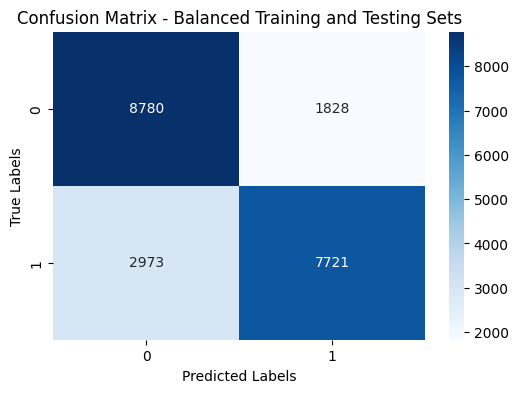

Accuracy: 0.7746221012111539
Precision: 0.8085663420253429
Recall: 0.7219936412941836
F1-score: 0.7628315961072963


In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assign all features to X, excluding the target column

X = df.drop(columns=['readmitted'])
y = df['readmitted']

# SMOTE to oversample the minority class befor splitting the data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Logistic Regression model with class weights to handle imbalance
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probability for class "1"
threshold =  0.48
y_pred = (y_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Balanced Training and Testing Sets')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Eevaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#### Make Predictions Regarding the Future values using the Testing Sets

In [37]:
# Generate probabilities for the positive class
test_probabilities = logreg.predict_proba(X_test)[:, 1]

# Apply a threshold to derive binary predictions
test_predictions = (test_probabilities > threshold).astype(int)

# Combine the test set with predictions and probabilities
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual_Label'] = y_test.values
X_test_with_predictions['Predicted_Probability'] = test_probabilities
X_test_with_predictions['Predicted_Label'] = test_predictions

# Display relevant columns (add columns of interest)
columns_to_display = ['gender', 'age', 'Predicted_Probability', 'Predicted_Label', 'Actual_Label']
result = X_test_with_predictions[columns_to_display]

# Display the first few rows
print(result.head())


       gender  age  Predicted_Probability  Predicted_Label  Actual_Label
34321       1   65               0.386353                0             0
11673       0   75               0.136796                0             0
69550       0   45               0.870623                1             1
53728       1   55               0.984732                1             1
62192       0   75               0.646259                1             1


##### Training Logistic Regression with SMOTE and Making Prediction on Unbalanced Testing Sets
We oversample the minority class using Synthetic Minority Oversampling Technique (SMOTE) to address class imbalance after splitting the data into training and testing. In this case, the model is trained on a balanced training sets while the testing sets remain unbalanced. The result reflects the natural imbalance in the dataset.

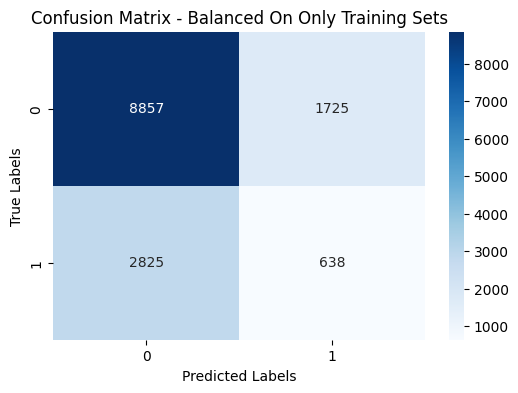

Accuracy: 0.6760412958348166
Precision: 0.26999576809140924
Recall: 0.18423332370776782
F1-score: 0.21901819430140748


In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assign all features to X, excluding the target column

X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # SMOTE to oversample the minority class in training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Logistic Regression model with class weights to handle imbalance
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')

# Train the model
logreg.fit(X_res, y_res)

# Make predictions on the test set
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probability for class "1"
threshold =  0.48
y_pred = (y_prob > threshold).astype(int)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred, pos_label=1)
recall_logreg = recall_score(y_test, y_pred, pos_label=1)
f1_logreg = f1_score(y_test, y_pred, pos_label=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Balanced On Only Training Sets')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Eevaluation metrics
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-score:", f1_logreg)

#### Make Predictions Regarding the Future values using the Testing Sets

In [39]:
#Generate probabilities for the positive class
test_probabilities = logreg.predict_proba(X_test)[:, 1]

# Apply a threshold to derive binary predictions
test_predictions = (test_probabilities > threshold).astype(int)

# Combine the test set with predictions and probabilities
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual_Label'] = y_test.values
X_test_with_predictions['Predicted_Probability'] = test_probabilities
X_test_with_predictions['Predicted_Label'] = test_predictions

columns_to_display = ['gender', 'age','Predicted_Probability', 'Predicted_Label', 'Actual_Label']
result = X_test_with_predictions[columns_to_display]
print(result.head())

       gender  age  Predicted_Probability  Predicted_Label  Actual_Label
46472       0   75               0.638431                1             1
84396       1   65               0.214421                0             0
73027       0   85               0.153708                0             1
3078        0   55               0.239695                0             0
82117       0   55               0.202112                0             0


##### Model Parameters Tunned

**Class Weights  :**

We have used the *class_weight='balanced'*  to handle class imbalance. This automatically adjusts the weights for the minority and majority classes, helping to balance their influence on the model.


**Synthetic Minority Oversampling Technique (SMOTE) to address class imbalance**


**Threshold Adjustment:**

We analyze the optimal threshold for our logistic regression model by maximizing the F1 score, which provides a balance between precision and recall. To identify the optimal threshold, we evaluate a range of thresholds and calculate the corresponding F1 score for each. The threshold that delivers the highest F1 score is determined to be the optimal value, which in this case is 0.48.

By setting the threshold to 0.48 we aim to enhance the model's performance, particularly for the minority class in our imbalanced dataset. To illustrate the impact of varying thresholds on the F1 score, we plot an F1 score curve. This visualization offers insights into the trade-offs between precision and recall, assisting in the fine-tuning of the model to achieve better predictive accuracy.

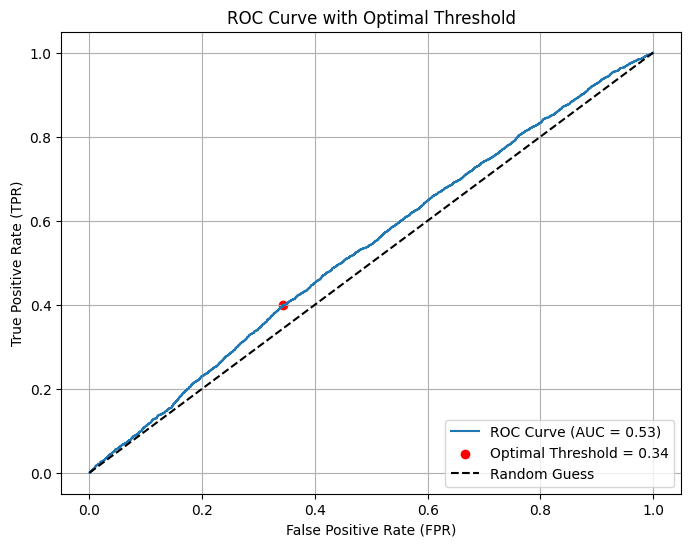

The optimal threshold is: 0.34


In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Calculate probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Find the optimal threshold (closest to (0,1) on the ROC curve)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the optimal threshold
print(f"The optimal threshold is: {optimal_threshold:.2f}")


#### Feature Importance: Logistic regression

In [41]:
# Fit the logistic regression model
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')
logreg.fit(X_train, y_train)

col_names = df.columns.tolist()  
col_names = df.drop('readmitted', axis=1).columns.tolist()

# Check that the number of features matches the length of coefficients
assert len(col_names) == len(logreg.coef_[0]), "Mismatch between number of columns and coefficients"

# Create the DataFrame for feature importances
feature_importances = pd.DataFrame(logreg.coef_[0], index=col_names, columns=['importance'])

# Sort the DataFrame to see the most important features first
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Displaying 30 sorted feature importances
pd.set_option('display.max_rows', 30)  
print(feature_importances)



                             importance
discharge_disposition_id_28    1.830478
discharge_disposition_id_9     1.584433
discharge_disposition_id_22    1.371818
discharge_disposition_id_15    1.265277
discharge_disposition_id_5     0.906441
...                                 ...
admission_source_id_10        -0.305206
discharge_disposition_id_17   -0.372915
discharge_disposition_id_10   -0.437335
discharge_disposition_id_23   -0.445931
discharge_disposition_id_16   -0.595126

[85 rows x 1 columns]


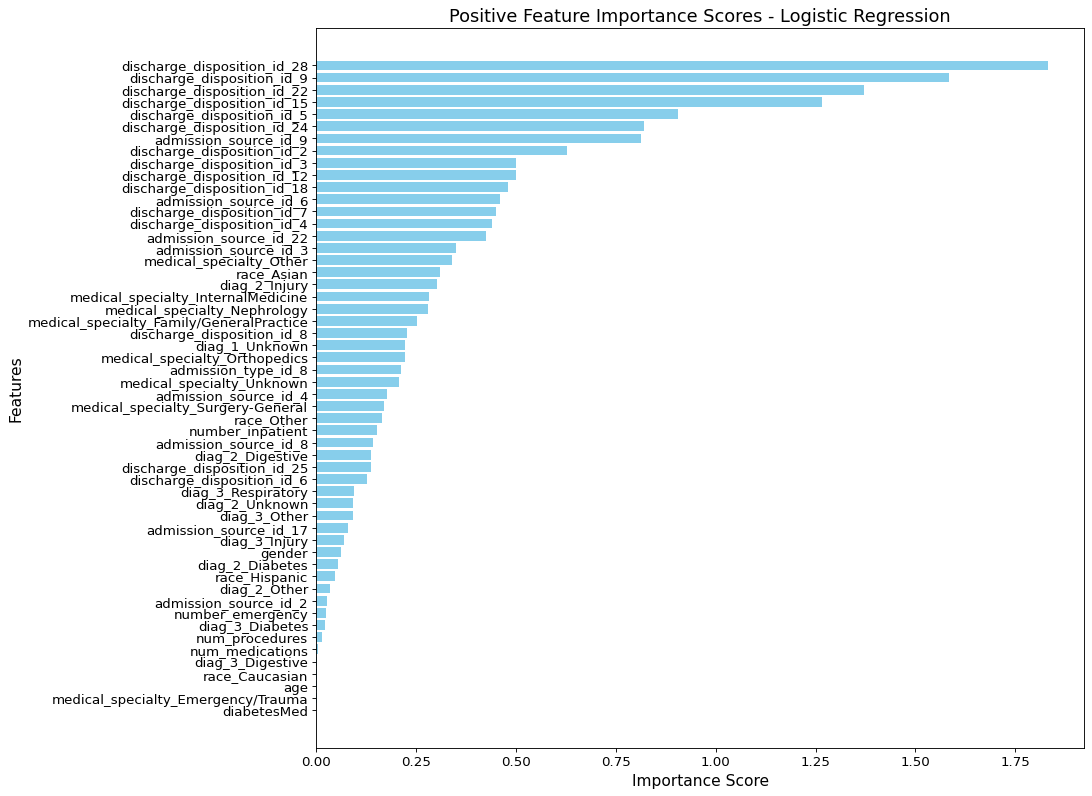

In [42]:
# Filter out features with positive importance scores
positive_feature_importances = feature_importances[feature_importances['importance'] > 0]

# Get the number of positive features
num = len(positive_feature_importances)
ylocs = np.arange(num)

# Sort the feature importances in descending order
values_to_plot = positive_feature_importances['importance'].values.ravel()[::-1]
feature_labels = list(positive_feature_importances.index)[::-1]

# Plotting
plt.figure(figsize=(16, 10), dpi=80)  # Larger figure for better clarity
plt.barh(ylocs, values_to_plot, align='center', color='skyblue')  # Added color for better contrast

plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=14)
plt.title('Positive Feature Importance Scores - Logistic Regression', fontsize=16)
plt.yticks(ylocs, feature_labels, fontsize=12)  
plt.xticks(fontsize=12)

# Optional: Increase figure padding to ensure that all feature names fit properly
plt.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.05)

# Display the plot
plt.show()

#### Model Evaluation: Logistic Reggression

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_probabilities)

# Display metrics
print("Evaluation Metrics-Logistic Reggression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Evaluation Metrics-Logistic Reggression:
Accuracy: 0.68
Precision: 0.27
Recall: 0.18
F1-Score: 0.22
ROC-AUC Score: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     10582
           1       0.27      0.18      0.22      3463

    accuracy                           0.68     14045
   macro avg       0.51      0.51      0.51     14045
weighted avg       0.64      0.68      0.65     14045



### Random Forest Classifier

In this section, the Random Forest Classifier is applied to the dataset to be analysed. The operations performed are described below:

* The target class is defined (readmitted)
* Split the dataset in train set and test set 
* Balancing the train set using SMOTE
* Searching for hyperparameters 
* Apply the random forest classifier using GridSearch and the hyperparameters found in the previous step
* Training the model
* Make a predicition  

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Hyperparameter using GridSearchCV
param_grid = {
     'n_estimators': [100, 200],
     'max_depth': [10, 20],
     'min_samples_split': [ 5, 10],
     'min_samples_leaf': [ 2, 4],
     'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid,
                            scoring='f1_weighted',
                            cv=3,
                            verbose=2,
                            n_jobs=-1)

# Train model
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Prediction
y_prob = best_rf.predict_proba(X_test)[:, 1]
threshold =  0.5
y_pred = (y_prob > threshold).astype(int)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Model Evaluation
In this part, it is evaluated the accuracy of the model, precision, recall and the f1 score. Moreover, it is shown the confusion matrix in order to better understand the performance of the model.

Accuracy: 0.7240495514737292
Precision: 0.6448963162450635
Recall: 0.7240495514737292
F1-score: 0.6630324905212214

Confusion Matrix:
[[6573  473]
 [2111  207]]


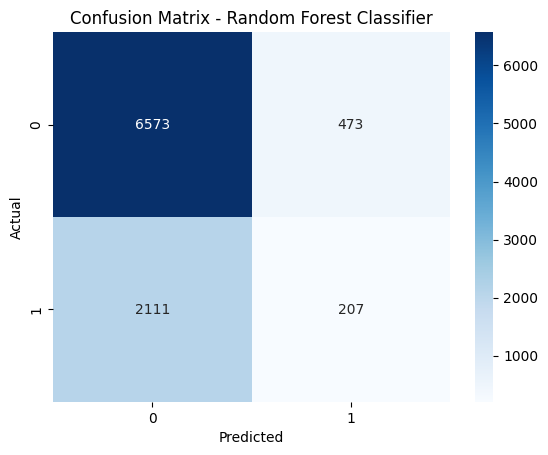


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      7046
           1       0.30      0.09      0.14      2318

    accuracy                           0.72      9364
   macro avg       0.53      0.51      0.49      9364
weighted avg       0.64      0.72      0.66      9364



In [45]:
# Evaluation metrics
accuracy_random = accuracy_score(y_test, y_pred)
precision_random = precision_score(y_test, y_pred, average='weighted')
recall_random = recall_score(y_test, y_pred, average='weighted')
f1_random = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_random)
print("Precision:", precision_random)
print("Recall:", recall_random)
print("F1-score:", f1_random)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### ROC Curve
The ROC curve represent the performance of a binary classification model at various threshold levels: It is use for assessing the model's ability to distinguish between the two classes.

Optimal Threshold: 0.20202020202020204
Max F1 Score: 0.400682164976214


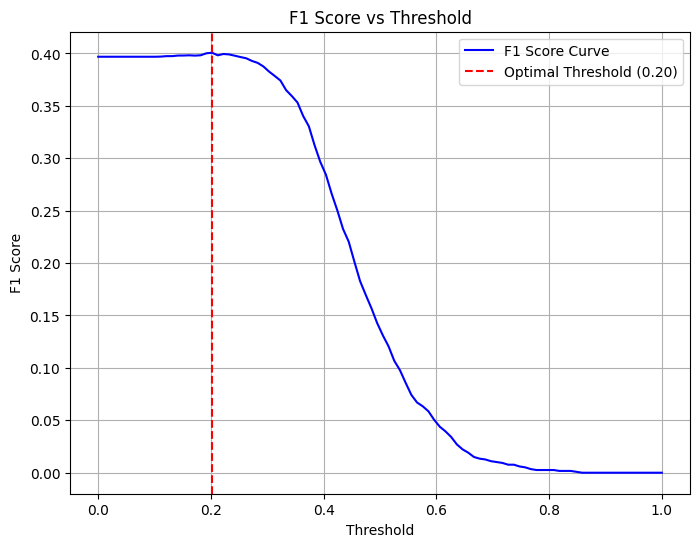

In [46]:
# Calculate F1 scor
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold, pos_label=1)
    f1_scores.append(f1)

# Find the threshold for the maximum F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print("Optimal Threshold:", optimal_threshold)
print("Max F1 Score:", max(f1_scores))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score Curve', color='blue')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Feature importance

In [47]:
col_names = df.drop('readmitted', axis=1).columns.tolist()

assert len(col_names) == len(best_rf.feature_importances_), "Mismatch between number of columns and feature importances"

feature_importances = pd.DataFrame(best_rf.feature_importances_, index=col_names, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

pd.set_option('display.max_rows', 10)
print(feature_importances)

                             importance
insulin_No                     0.057882
num_lab_procedures             0.054253
insulin_Steady                 0.050694
num_medications                0.047435
change                         0.037216
...                                 ...
admission_type_id_4            0.000000
admission_source_id_10         0.000000
discharge_disposition_id_27    0.000000
discharge_disposition_id_10    0.000000
discharge_disposition_id_17    0.000000

[85 rows x 1 columns]


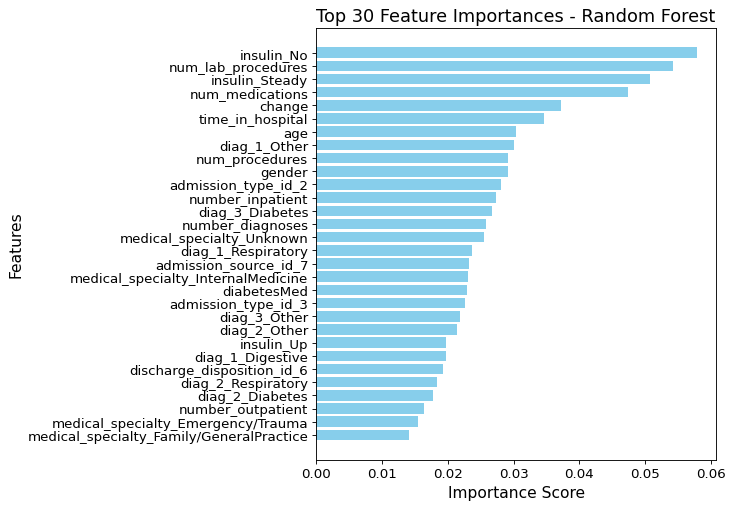

In [48]:
# Positive feature importance
positive_feature_importances = feature_importances[feature_importances['importance'] > 0]

top_features = feature_importances.head(30)

# Number of feature to visualize and sort
num = len(top_features)
ylocs = np.arange(num)
values_to_plot = top_features['importance'].values.ravel()[::-1]
feature_labels = list(top_features.index)[::-1]

plt.figure(figsize=(10, 6), dpi=80)
plt.barh(ylocs, values_to_plot, align='center', color='skyblue')
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=14)
plt.title('Top 30 Feature Importances - Random Forest', fontsize=16)
plt.yticks(ylocs, feature_labels, fontsize=12)
plt.xticks(fontsize=12)
plt.subplots_adjust(left=0.3, right=0.8, top=0.95, bottom=0.05)
plt.show()

#### Making Prediction on the Test Set 

In [49]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual_Label'] = y_test.values
X_test_with_predictions['Predicted_Probability'] = y_prob
X_test_with_predictions['Predicted_Label'] = y_pred

columns_to_display = ['gender', 'age', 'Predicted_Probability', 'Predicted_Label', 'Actual_Label']
result = X_test_with_predictions[columns_to_display]
print(result.head())

       gender  age  Predicted_Probability  Predicted_Label  Actual_Label
46472       0   75               0.657703                1             1
84396       1   65               0.295589                0             0
73027       0   85               0.232132                0             1
3078        0   55               0.242457                0             0
82117       0   55               0.294905                0             0


### Decision Tree

Cross Validation score: 70.21%
Dev Set score: 63.37%


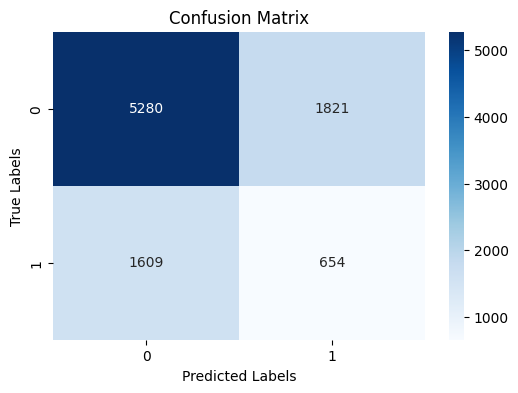

Accuracy is 0.63
Precision is 0.26
Recall is 0.29
F1-score 0.28


In [50]:
# Data balancing applied using SMOTE
from sklearn.model_selection import train_test_split

X_dt = df.drop(columns=['readmitted'])
y_dt = df['readmitted']
smt = SMOTE(random_state=20)
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, y_dt, test_size=0.20, random_state=42, stratify=y)
X_train_balance_dt, Y_train_balance_dt = smt.fit_resample(X_train_dt, Y_train_dt)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)

print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dt, X_train_dt, Y_train_dt, cv=10))))
dt.fit(X_train_balance_dt, Y_train_balance_dt)
print("Dev Set score: {:.2%}".format(dt.score(X_test_dt, Y_test_dt)))
Y_predict_dt = dt.predict(X_test_dt)
cm = confusion_matrix(Y_test_dt, Y_predict_dt, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
pd.crosstab(pd.Series(Y_test_dt, name = 'Actual'), pd.Series(Y_predict_dt, name = 'Predict'), margins = True)
accuracy_dt = accuracy_score(Y_test_dt, Y_predict_dt)
precision_dt = precision_score(Y_test_dt, Y_predict_dt)
recall_dt = recall_score(Y_test_dt, Y_predict_dt)
f1_dt = f1_score(Y_test_dt, Y_predict_dt)
print("Accuracy is {0:.2f}".format(accuracy_dt))
print("Precision is {0:.2f}".format(precision_dt))
print("Recall is {0:.2f}".format(recall_dt))
print("F1-score {0:.2f}".format(f1_dt))


#### Make   a Prediction on the Test Data

In [51]:
# Output predictions with additional columns
# Assuming 'gender' and 'age' are columns in your original DataFrame and are aligned with the test set
predictions_df = X_test_dt.copy()
predictions_df['Actual'] = Y_test_dt
predictions_df['Predicted'] = Y_predict_dt

# Include only relevant columns for display
if 'gender' in predictions_df.columns and 'age' in predictions_df.columns:
    predictions_df_display = predictions_df[['gender', 'age', 'Actual', 'Predicted']]
else:
    print("Warning: 'gender' or 'age' columns not found in the test data. Displaying predictions without these features.")
    predictions_df_display = predictions_df[['Actual', 'Predicted']]

# Display the first few rows of predictions
print(predictions_df_display.head())


       gender  age  Actual  Predicted
28495       1   65       0          0
13919       0   65       1          1
83674       0   75       0          0
53446       0   35       0          1
65906       1   75       0          1


#### Feature Important Decision Tree

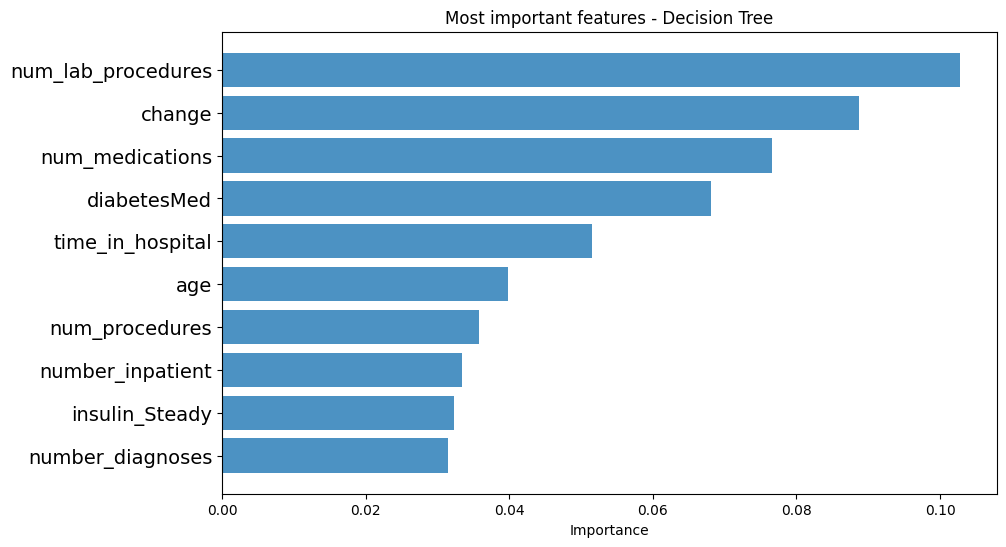

In [52]:
# feature importance 
feature_names = X_train_dt.columns
feature_imports = dt.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

## Models Evaluation 

In [53]:
print('LogisticRegression:')
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-score:", f1_logreg)
print('\n')
print('Random Forest Classifier:')
print("Accuracy:", accuracy_random)
print("Precision:", precision_random)
print("Recall:", recall_random)
print("F1-score", f1_random)

print('\n')
print('Decision Tree:')
print("Accuracy is {0:.2f}".format(accuracy_dt))
print("Precision is {0:.2f}".format(precision_dt))
print("Recall is {0:.2f}".format(recall_dt))
print("F1-score {0:.2f}".format(f1_dt))
print('\n')


LogisticRegression:
Accuracy: 0.6760412958348166
Precision: 0.26999576809140924
Recall: 0.18423332370776782
F1-score: 0.21901819430140748


Random Forest Classifier:
Accuracy: 0.7240495514737292
Precision: 0.6448963162450635
Recall: 0.7240495514737292
F1-score 0.6630324905212214


Decision Tree:
Accuracy is 0.63
Precision is 0.26
Recall is 0.29
F1-score 0.28




Based on our evaluation metrics, we found that the Random Forest Classifier demonstrated the best overall performance, achieving the highest scores across key metrics: an accuracy of 72.40%, precision of 64.49%, recall of 72.40%, and F1-score of 66.30%. These results show that it effectively balances precision and recall, making it the most reliable model for predicting patient readmissions within 30 days. In comparison, our other models, including Logistic Regression, and Decision Tree, underperformed, particularly in terms of recall and F1-score, which are critical for this classification task.

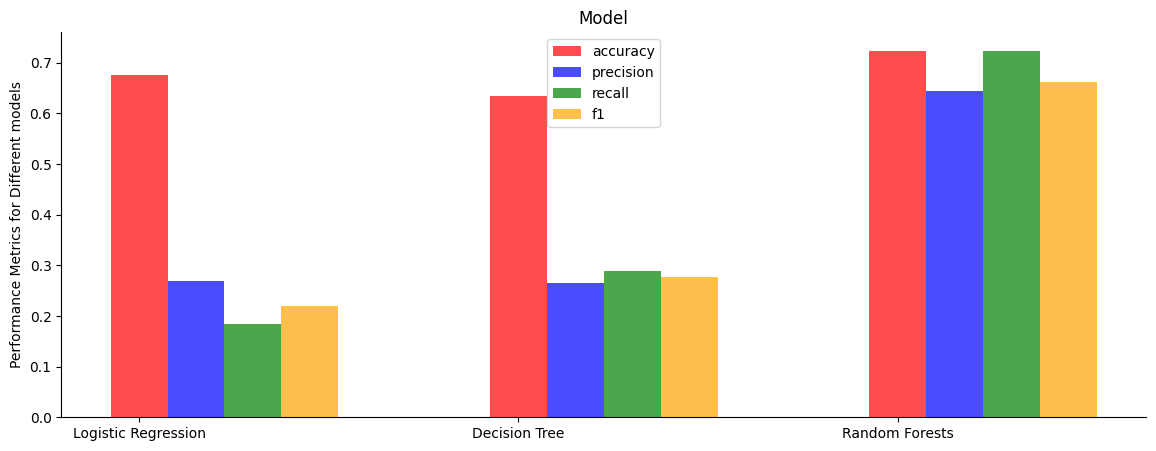

In [54]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logreg, accuracy_dt, accuracy_random]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [precision_logreg, precision_dt, precision_random]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_logreg, recall_dt, recall_random]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree','Random Forests'
          ]
values = [f1_logreg, f1_dt, f1_random]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'f1')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

##  Conclusion
Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On held out test data, our best model is Random Forest Classifier that had an Accuracy of 72% and 72% Recall. Using this model, we are able to catch 72% of the patient readmissions within 30 days of dicharge. The model performs approximately 3 times better than randomly selecting patients.